In [1]:
!pip install gradio
!pip install shap

In [2]:
# importações
import pandas as pd
import numpy as np
import seaborn as sns
import gradio as gr
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## 1- Análise Exploratória dos dados

*** Os dados de Visualizações de Página que não são de acesso público são apenas uma representação, não são dados verdadeiros

Legendas:
sim = 1
não = 0

Tipos de CTA:
nenhum = 0
assista = 1
confira = 2
conheça = 3
entenda = 4
saiba = 5
veja = 6

dias da semana: 0 = segunda
1 = terça
2 = quarta
3 = quinta
4 = sexta
5 = sábado
6 = domingo

Categoria autores: 
Editorias = 0
Jornalista sozinho = 1
Jornalistas juntos = 2

In [3]:
# importando base de dados
df = pd.read_csv('dados_modificados.csv')
df.head()

,Página,Visualizações de página,Categoria,Título,Ntítulo,Subtítulo,Nsubtítulo,Vídeo,Número de vídeo,Imagem,...,Data Publicação,Mês,Dia da semana,Hora Publicação,Autor,Categorias Autores,CTA,Tipos de CTA,CTAS,Horário
0,globoesporte.globo.com/futebol/times/sao-paulo...,727.0,Sao-paulo,São paulo troca de comando após 28ª eliminação...,16,Julio casares assume presidência na sexta com ...,15,0,0,1,...,2020-12-31,12,3,07h00,Por redação do ge,0,0,-,0,7.00
1,globoesporte.globo.com/futebol/times/botafogo/...,391.0,Botafogo,"Marcinho, ex-botafogo, é aguardado para presta...",16,Lateral é suspeito de dirigir carro em acident...,34,0,0,1,...,2021-01-01,1,4,11h49,Por felipe schmidt e rodrigo cerqueira,2,0,-,0,11.82
2,globoesporte.globo.com/futebol/futebol-interna...,387.0,Futebol-internacional,Libertadores 2021 terá time que joga a 4 mil m...,17,"Always ready, de el alto, é campeão boliviano ...",29,0,0,1,...,2021-01-01,1,4,06h00,Por redação do ge,0,1,veja,6,6.00
3,globoesporte.globo.com/futebol/times/corinthia...,372.0,Corinthians,Corinthians encerra contrato com 12 jogadores ...,13,Mauro boselli e sidcley estão entre os que se ...,13,0,0,1,...,2020-12-31,12,3,11h00,Por marcelo braga,1,1,veja,6,11.00
4,globoesporte.globo.com/futebol/times/flamengo/...,355.0,Flamengo,"Radar dos emprestados: yuri césar, ronaldo e h...",15,Alex muralha chega ao fim do contrato com o fl...,25,0,0,1,...,2021-01-01,1,4,05h00,Por fred huber,1,1,veja,6,5.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25705 entries, 0 to 25704
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Página                   25705 non-null  object 
 1   Visualizações de página  25705 non-null  float64
 2   Categoria                25705 non-null  object 
 3   Título                   25705 non-null  object 
 4   Ntítulo                  25705 non-null  int64  
 5   Subtítulo                25705 non-null  object 
 6   Nsubtítulo               25705 non-null  int64  
 7   Vídeo                    25705 non-null  int64  
 8   Número de vídeo          25705 non-null  int64  
 9   Imagem                   25705 non-null  int64  
 10  Número de imagens        25705 non-null  int64  
 11  Palavras no texto        25705 non-null  int64  
 12  Tags                     25705 non-null  object 
 13  Contém tag               25705 non-null  int64  
 14  Data Publicação       

In [5]:
df.describe()

,Visualizações de página,Ntítulo,Nsubtítulo,Vídeo,Número de vídeo,Imagem,Número de imagens,Palavras no texto,Contém tag,Mês,Dia da semana,Categorias Autores,CTA,CTAS,Horário
count,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000,25705.000000
mean,50.551994,13.914958,20.783933,0.248317,0.248434,0.962459,2.168528,388.636802,0.592959,3.586189,2.894534,0.451585,0.128691,0.684575,13.322541
std,107.161819,2.635424,7.089761,0.432045,0.432383,0.190088,1.870537,298.121662,0.491292,1.814556,1.961831,0.649223,0.334864,1.860658,5.908845
min,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,12.000000,15.000000,0.000000,0.000000,1.000000,1.000000,224.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,9.000000
50%,16.000000,14.000000,20.000000,0.000000,0.000000,1.000000,2.000000,316.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,13.580000
75%,47.000000,16.000000,27.000000,0.000000,0.000000,1.000000,3.000000,454.000000,1.000000,5.000000,5.000000,1.000000,0.000000,0.000000,18.130000
max,2428.000000,28.000000,49.000000,1.000000,2.000000,1.000000,58.000000,10418.000000,1.000000,12.000000,6.000000,2.000000,1.000000,6.000000,23.980000


### Correlação

<AxesSubplot:>

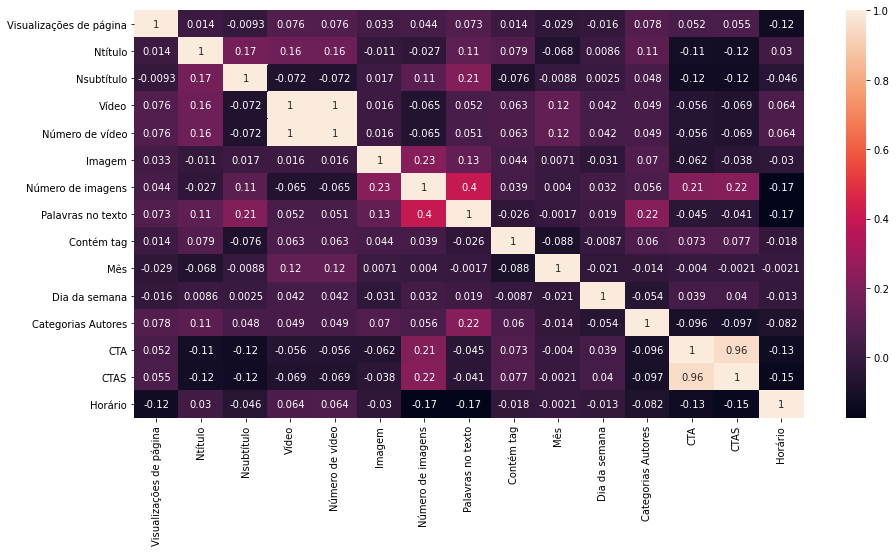

In [6]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df.corr(), annot=True)

Anotações: 
Tirar categorias: ('CTAS', 'Visualizações de páginas únicas', 'Entradas', 'Taxa de Rejeição', 'Porcentagem de saída', 'Número de vídeo')

### Histogramas

<function matplotlib.pyplot.show(close=None, block=None)>

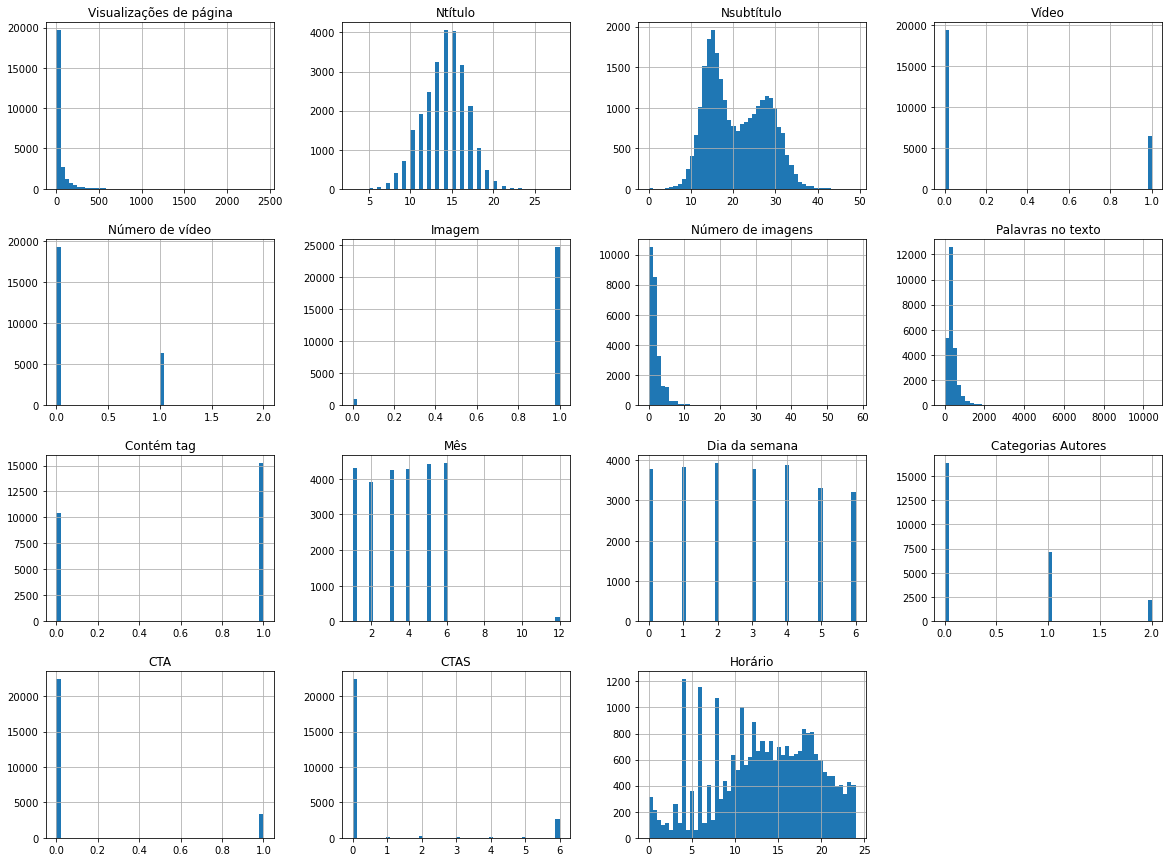

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show

### Boxplot

<AxesSubplot:xlabel='Categorias Autores', ylabel='Visualizações de página'>

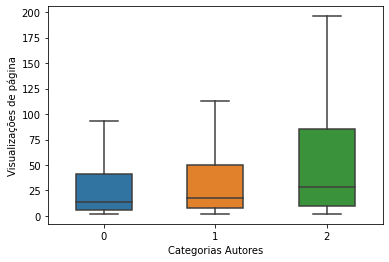

In [8]:
sns.boxplot(y='Visualizações de página', x='Categorias Autores', data=df, orient='v', width=0.5, showfliers=False)

<AxesSubplot:xlabel='CTA', ylabel='Visualizações de página'>

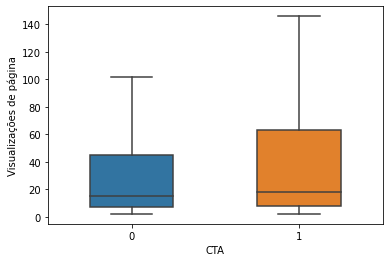

In [9]:
sns.boxplot(y='Visualizações de página', x='CTA', data=df, orient='v', width=0.5, showfliers=False)

<AxesSubplot:xlabel='Contém tag', ylabel='Visualizações de página'>

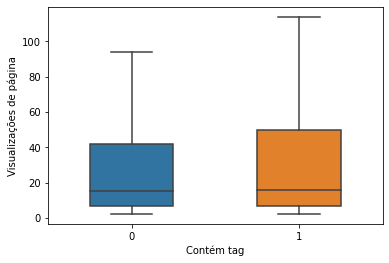

In [10]:
sns.boxplot(y='Visualizações de página', x='Contém tag', data=df, orient='v', width=0.5, showfliers=False)

<AxesSubplot:xlabel='Imagem', ylabel='Visualizações de página'>

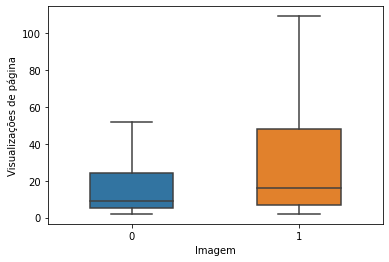

In [11]:
sns.boxplot(y='Visualizações de página', x='Imagem', data=df, orient='v', width=0.5, showfliers=False)

## 2- Tratamento dos dados e definição de features

In [12]:
len(df['Categoria'].unique())

384

In [13]:
nsub = []
for n in df['Nsubtítulo']:
    if n == "-":
        nsub.append(0)
    else:
        nsub.append(int(n))
df['Nsubtítulo'] = nsub

In [14]:
horas = []
for i in df['Hora Publicação']:
    hora = int(i[:2])
    minuto = int(i[3:]) / 60
    hora += round(minuto, 2)
    horas.append(hora)
df['Horário'] = horas

### Classificação Categorias usando KMeans

In [15]:
pg = pd.DataFrame(df.groupby('Categoria').agg({'Página' : 'count', "Visualizações de página" : 'sum'}))
pg['Visualizações de página/Página'] = round(pg["Visualizações de página"]/pg['Página'])
pg.sort_values(by="Visualizações de página/Página", ascending=False)

,Página,Visualizações de página,Visualizações de página/Página
Categoria,,,
Copa do brasil,3,439.0,146.0
Redacao-sportv,6,859.0,143.0
Mundial-de-clubes,37,5172.0,140.0
Esgrima,1,137.0,137.0
Copa américa,1,137.0,137.0
...,...,...,...
Serra-macaense,1,4.0,4.0
Sao-paulo-crystal,1,4.0,4.0
Pbr,1,3.0,3.0


In [16]:
# definição de features
features = ['Página', 'Visualizações de página/Página']

In [17]:
X = pg[features]
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
kmean = KMeans(n_clusters=3, random_state=12345)
kmean.fit(scaled_X)
cluster_label = kmean.predict(scaled_X)
pg["cluster_label"] = cluster_label
pg = pg.reset_index()
pg.groupby('cluster_label').count()

,Categoria,Página,Visualizações de página,Visualizações de página/Página
cluster_label,,,,
0,298,298,298,298
1,69,69,69,69
2,17,17,17,17


In [18]:
pg.loc[pg.cluster_label == 1]

,Categoria,Página,Visualizações de página,Visualizações de página/Página,cluster_label
6,America-mg,93,4536.0,49.0,1
11,Araguacema,2,114.0,57.0,1
12,Argentina,1,87.0,87.0,1
15,Athletic-club,12,855.0,71.0,1
25,Augustox,1,51.0,51.0,1
...,...,...,...,...,...
340,Sportv-news,1,63.0,63.0,1
358,Triatlo,1,55.0,55.0,1
359,Troca-de-passes,5,374.0,75.0,1
362,Tutoriais,8,553.0,69.0,1


In [19]:
pg.groupby('cluster_label').mean()

,Página,Visualizações de página,Visualizações de página/Página
cluster_label,,,
0,24.627517,520.053691,17.328859
1,58.202899,4738.159420,79.275362
2,844.117647,48090.000000,53.823529


In [20]:
cluster0 = list(pg.loc[pg["cluster_label"]==0]['Categoria'])
cluster1 = list(pg.loc[pg["cluster_label"]==1]['Categoria'])
cluster2 = list(pg.loc[pg["cluster_label"]==2]['Categoria'])

## Classificações Clusters

### Cluster 0 = Categorias com matéria média e pouco view
### Cluster 1 = Categorias com pouca matéria e com view médio
### Cluster 2 = Categorias com muita matéria e muito view


### Classificação por Categoria no DataFrame Original

In [21]:
len(df)

25705

In [22]:
# drop categoria outlier
df = df[df["Categoria"].str.contains("Copa sul-americana")==False]

In [23]:
cluster = []

for j in df["Categoria"]:
    if (j in cluster0):
        cluster.append(0)
    elif (j in cluster1):
        cluster.append(1)
    elif (j in cluster2):
        cluster.append(2)
    elif (j in cluster3):
        cluster.append(3)

In [24]:
df['Classificação Categorias'] = cluster

In [25]:
df

,Página,Visualizações de página,Categoria,Título,Ntítulo,Subtítulo,Nsubtítulo,Vídeo,Número de vídeo,Imagem,...,Mês,Dia da semana,Hora Publicação,Autor,Categorias Autores,CTA,Tipos de CTA,CTAS,Horário,Classificação Categorias
0,globoesporte.globo.com/futebol/times/sao-paulo...,727.0,Sao-paulo,São paulo troca de comando após 28ª eliminação...,16,Julio casares assume presidência na sexta com ...,15,0,0,1,...,12,3,07h00,Por redação do ge,0,0,-,0,7.00,2
1,globoesporte.globo.com/futebol/times/botafogo/...,391.0,Botafogo,"Marcinho, ex-botafogo, é aguardado para presta...",16,Lateral é suspeito de dirigir carro em acident...,34,0,0,1,...,1,4,11h49,Por felipe schmidt e rodrigo cerqueira,2,0,-,0,11.82,2
2,globoesporte.globo.com/futebol/futebol-interna...,387.0,Futebol-internacional,Libertadores 2021 terá time que joga a 4 mil m...,17,"Always ready, de el alto, é campeão boliviano ...",29,0,0,1,...,1,4,06h00,Por redação do ge,0,1,veja,6,6.00,1
3,globoesporte.globo.com/futebol/times/corinthia...,372.0,Corinthians,Corinthians encerra contrato com 12 jogadores ...,13,Mauro boselli e sidcley estão entre os que se ...,13,0,0,1,...,12,3,11h00,Por marcelo braga,1,1,veja,6,11.00,2
4,globoesporte.globo.com/futebol/times/flamengo/...,355.0,Flamengo,"Radar dos emprestados: yuri césar, ronaldo e h...",15,Alex muralha chega ao fim do contrato com o fl...,25,0,0,1,...,1,4,05h00,Por fred huber,1,1,veja,6,5.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25700,ge.globo.com/futebol/selecao-brasileira/notici...,4.0,Selecao-brasileira,Thiago silva vê marquinhos entre os três melho...,17,Jogador do chelsea ressalta maturidade do comp...,31,0,0,1,...,6,2,14h30,Por guilherme macedo e raphael zarko,2,0,-,0,14.50,1
25701,ge.globo.com/mt/futebol/times/cuiaba/noticia/s...,4.0,Cuiaba,"Sem joão lucas, cuiabá deve ter apenas uma alt...",15,O lateral-direito será desfalque por motivo du...,18,0,0,1,...,6,2,18h19,Por jonathas gabetel,1,1,veja,6,18.32,1
25702,ge.globo.com/pr/futebol/times/coritiba/noticia...,4.0,Coritiba,"Coritiba vence a quarta seguida, completa 360 ...",17,"Com gol de waguininho no primeiro tempo, corit...",29,0,0,1,...,6,1,20h54,Por fernando freire,1,0,-,0,20.90,0
25703,ge.globo.com/futebol/selecao-brasileira/notici...,4.0,Selecao-brasileira,"Thiago silva evita críticas à conmebol, mas di...",19,Zagueiro da seleção brasileira também minimiza...,28,0,0,1,...,6,2,13h28,Por guilherme macedo e raphael zarko,2,0,-,0,13.47,1


In [26]:
for k in df.groupby('Classificação Categorias')['Categoria'].unique():
    print(len(k))

298
69
17


In [27]:
# salvando o dataframe classificado
df.to_csv("matérias_classificadas.csv", index=False)

In [28]:
df['Página'].count()

25705

In [29]:
df.groupby('Classificação Categorias')['Página'].count()

Classificação Categorias
0     7339
1     4016
2    14350
Name: Página, dtype: int64

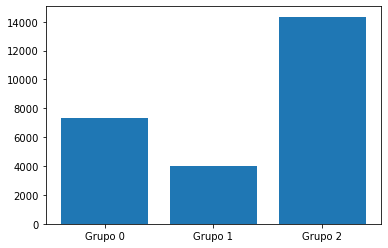

In [30]:
# quanto cada grupo representa em matérias
grupos = ['Grupo 0', 'Grupo 1', 'Grupo 2']
valores = [7339, 4016, 14350]
plt.bar(grupos, valores)
plt.show()

In [31]:
df.groupby('Classificação Categorias')['Visualizações de página'].sum()

Classificação Categorias
0    154976.0
1    326933.0
2    817530.0
Name: Visualizações de página, dtype: float64

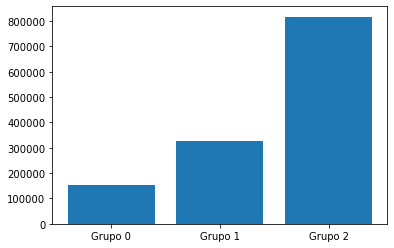

In [32]:
# quanto cada grupo representa em pageviews
grupos = ['Grupo 0', 'Grupo 1', 'Grupo 2']
valores = [154976.0, 326933.0, 817530.0]
plt.bar(grupos, valores)
plt.show()

## 3 - Modelo de classificação

In [33]:
df["Classificação Categorias"].value_counts()

2    14350
0     7339
1     4016
Name: Classificação Categorias, dtype: int64

### Modelo Grupo 0

In [34]:
df0 = pd.DataFrame(df.loc[df["Classificação Categorias"]==0])
media_view = round(df0['Visualizações de página'].mean())
media = []
for i in df0['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df0['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df0.loc[df0["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=50,
                             max_depth=6,
                             max_features=.8,
                             max_samples=.8,
                             random_state=12345, oob_score=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.79      1.00      0.88      1150
 Acima da média       1.00      0.02      0.04       318

       accuracy                           0.79      1468
      macro avg       0.89      0.51      0.46      1468
   weighted avg       0.83      0.79      0.70      1468



In [35]:
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.6194052502050862

In [36]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [53]:
df0 = pd.DataFrame(df.loc[df["Classificação Categorias"]==0])
media_view = round(df0['Visualizações de página'].mean())
media = []
for i in df0['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df0['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df0.loc[df0["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=1800,
                             min_samples_split=2,
                             min_samples_leaf=2,
                             max_features='auto',
                             max_depth=None,
                             bootstrap=True,
                            random_state=12345, oob_score=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.80      0.99      0.88      1150
 Acima da média       0.68      0.08      0.15       318

       accuracy                           0.79      1468
      macro avg       0.74      0.54      0.51      1468
   weighted avg       0.77      0.79      0.72      1468



In [54]:
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.622831555920153

### Modelo Grupo 1

In [39]:
df1 = pd.DataFrame(df.loc[df["Classificação Categorias"]==1])
media_view = round(df1['Visualizações de página'].mean())
media = []
for i in df1['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df1['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df1.loc[df1["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=50,
                             max_depth=6,
                             max_features=.8,
                             max_samples=.8,
                            random_state=12345, oob_score=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.76      0.96      0.85       587
 Acima da média       0.64      0.19      0.30       217

       accuracy                           0.75       804
      macro avg       0.70      0.58      0.57       804
   weighted avg       0.73      0.75      0.70       804



In [40]:
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.6744793097763367

In [41]:
# Calibração dos hiperparametros
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [51]:
df1 = pd.DataFrame(df.loc[df["Classificação Categorias"]==1])
media_view = round(df1['Visualizações de página'].mean())
media = []
for i in df1['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df1['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df1.loc[df1["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=800,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features='sqrt',
                             max_depth=90,
                             bootstrap=True,
                            random_state=12345, oob_score=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.77      0.97      0.86       587
 Acima da média       0.70      0.21      0.32       217

       accuracy                           0.76       804
      macro avg       0.74      0.59      0.59       804
   weighted avg       0.75      0.76      0.71       804



In [52]:
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.6922922930781368

### Modelo Grupo 2

In [44]:
df2 = pd.DataFrame(df.loc[df["Classificação Categorias"]==2])
media_view = round(df2['Visualizações de página'].mean())
media = []
for i in df2['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df2['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df2.loc[df2["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=50,
                              max_depth=6,
                              max_features=.8,
                              max_samples=.8,
                             random_state=12345, oob_score=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.77      0.98      0.87      2160
 Acima da média       0.71      0.13      0.21       710

       accuracy                           0.77      2870
      macro avg       0.74      0.55      0.54      2870
   weighted avg       0.76      0.77      0.70      2870



In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.7161795774647888

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [49]:
df2 = pd.DataFrame(df.loc[df["Classificação Categorias"]==2])
media_view = round(df2['Visualizações de página'].mean())
media = []
for i in df2['Visualizações de página']:
    if i >= media_view:
        media.append("Acima da média") 
    elif i < media_view:
        media.append("Abaixo da média")

df2['Perfomance Matérias'] = media
labels=["Acima da média", "Abaixo da média"]
subset = df2.loc[df2["Perfomance Matérias"].isin(labels),:]
features = ['Ntítulo', 'Nsubtítulo', 'Vídeo',
       'Imagem', 'Número de imagens', 'Palavras no texto',
       'Contém tag', 'Mês', 'Dia da semana',
       'Horário', 'Categorias Autores',
       'CTAS']
target = "Perfomance Matérias"
X = subset[features]
Y = subset[target]
label_encoder = LabelEncoder()
y = label_encoder.fit(Y).transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42, stratify=Y, shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=1600,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features='sqrt',
                             max_depth=10,
                             bootstrap=True,
                             random_state=12345)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

Abaixo da média       0.77      0.99      0.87      2160
 Acima da média       0.75      0.12      0.20       710

       accuracy                           0.77      2870
      macro avg       0.76      0.55      0.53      2870
   weighted avg       0.77      0.77      0.70      2870



In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.7308512649973917